# Own model on Oyster and green oyster mushroom (Convolutional Neural Networks)

In [41]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import backend as K
import tensorflow.keras as tk
from tensorflow.keras.datasets import mnist, fashion_mnist,cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
X = []
y = []
classes = ['oyster', 'green_oyster'] # define the classes
base_path = r'C:\Users\helge\spiced_projects_working folder\week9\imageclassifier-main\imageclassifier-main\week9_data\\'


In [43]:
for i, target in enumerate(classes):
    files = os.listdir(base_path+target)
    for file in files:
        # load the image
        img = load_img(base_path+target+'/'+file, target_size=(28, 28))
        # convert it to an array
        img_array = img_to_array(img)
        # append the array to X
        X.append(img_array)
        # append the numeric target to y
        y.append(i)

X = np.array(X)
y = np.array(y)

# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

In [44]:
X.shape

(923, 28, 28, 3)

In [45]:
img

In [46]:
img.size

(28, 28)

In [47]:
type(img)

PIL.Image.Image

#### LeNet-5 in Keras

Hint: Adjust the input_shape from 224 to 28, if you have issues with CPU or use Google Collap/ Kaggle

In [48]:
### Implement LeNet-5 architecture 
K.clear_session()
model = Sequential([
    
    ### Convolutional layers
    Conv2D(filters = 6 , kernel_size = (5,5), 
           strides = (1,1), padding = "valid" , 
           activation = tk.activations.relu , input_shape = (28,28,3), # use relu
           kernel_initializer=tk.initializers.GlorotNormal(seed=34)),  # how to initialise the model parameters
           
    
    MaxPooling2D(pool_size = (2,2), strides=(2,2), padding = "valid"),
    
    Conv2D(filters= 16, kernel_size = (5,5), strides = (1,1), padding = "valid" , 
           activation = tk.activations.relu) ,  # use relu
            
    
    MaxPooling2D(pool_size = (2,2), strides=(2,2), padding = "valid"),
    
    ### Fully connected layers for classification
    
    Flatten(),
    
    Dense(units=120, activation= tk.activations.relu),  # use relu
    
    Dense(units=84, activation=tk.activations.relu), # use relu
          
    
    
    # Output layer
    # think of how many categories we have to predict 
    Dense(units=10, activation=tk.activations.softmax)
])

In [49]:
# Check the summary:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [50]:
# Compile
model.compile(optimizer=tk.optimizers.Adam(), # Adam
              loss='sparse_categorical_crossentropy' , # multiclass: 'categorical_crossentropy' 
              metrics=['accuracy'])

In [51]:
# Train the model
history = model.fit(X, y, epochs=20,
                    batch_size=60,
                    validation_split = 0.2,
                   )

Epoch 1/20
13/13 [==============================] - 2s 61ms/step - loss: 10.5048 - accuracy: 0.5325 - val_loss: 0.7061 - val_accuracy: 0.7946
Epoch 2/20
13/13 [==============================] - 1s 44ms/step - loss: 1.0116 - accuracy: 0.7249 - val_loss: 0.7632 - val_accuracy: 0.7297
Epoch 3/20
13/13 [==============================] - 1s 45ms/step - loss: 0.4469 - accuracy: 0.8293 - val_loss: 0.4272 - val_accuracy: 0.8054
Epoch 4/20
13/13 [==============================] - 1s 44ms/step - loss: 0.2664 - accuracy: 0.8902 - val_loss: 0.3555 - val_accuracy: 0.8541
Epoch 5/20
13/13 [==============================] - 1s 45ms/step - loss: 0.1662 - accuracy: 0.9431 - val_loss: 0.2528 - val_accuracy: 0.8865
Epoch 6/20
13/13 [==============================] - 1s 50ms/step - loss: 0.1102 - accuracy: 0.9648 - val_loss: 0.2393 - val_accuracy: 0.9189
Epoch 7/20
13/13 [==============================] - 1s 44ms/step - loss: 0.0684 - accuracy: 0.9837 - val_loss: 0.2060 - val_accuracy: 0.9459
Epoch 8/20
1

### Examine the model

In [52]:
history.history

{'loss': [10.504815101623535,
  1.0116016864776611,
  0.44692227244377136,
  0.26642411947250366,
  0.16620540618896484,
  0.11015202105045319,
  0.06837087869644165,
  0.04754675552248955,
  0.028509948402643204,
  0.01991412416100502,
  0.0132296746596694,
  0.010484479367733002,
  0.007525422144681215,
  0.0053614904172718525,
  0.004170716740190983,
  0.003385005984455347,
  0.002659038407728076,
  0.002223293762654066,
  0.0018426066963002086,
  0.0015682326629757881],
 'accuracy': [0.5325203537940979,
  0.7249322533607483,
  0.8292682766914368,
  0.8902438879013062,
  0.9430894255638123,
  0.9647696614265442,
  0.9837398529052734,
  0.9918699264526367,
  0.998645007610321,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.7061172723770142,
  0.7631865739822388,
  0.42715132236480713,
  0.35553959012031555,
  0.25281187891960144,
  0.23926803469657898,
  0.20601020753383636,
  0.22316080331802368,
  0.2071470320224762,
  0.19460548460483

Text(0.5, 0, 'epochs')

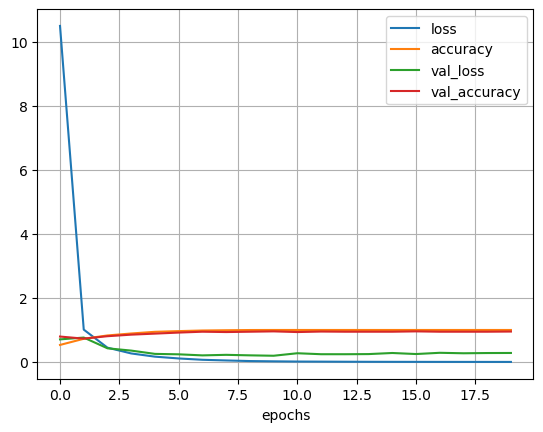

In [53]:
# Plot loss and accuracy curves
pd.DataFrame(data=history.history).plot()
plt.grid(True)
plt.xlabel('epochs')